$\LARGE{AS4501}$

Interpretability

Reference: Interpretable machine learning, A Guide for Making Black Box Models Explainable, Christoph Molnar



# Interpretability

An important aspect of ML is interpretability. 

Can we understand how a model does classification or regression for a given sample and does it agree with our intuition?

It's important for a model to be able to explain its decisions to check for the following:
    
- fairness: are the prediction unbiased?
- privacy: is sensitive data protected
- reliability or robustness: can small changes in the input lead to large changes in the prediction?
- debugging: By understanding the contributions of individual features, this can help in detecting issues or flaws in the model, such as overfitting, underfitting, or the presence of irrelevant features.
- causality: are only causal relations recovered?
- trust: can I trust the system? usually we trust something if we understand what it is doing.

# Classes of interpretability

Methods for interpretability can be classified as intrinsic or post hoc. 

Intrinsic interpretability refers to models that are simple enough to be understood, e.g., a decision tree or a linear regression.

Post hoc methods refers to methods that are applied to the model after training.

Moreover, while some models are intrinsically interpretable, such as decision trees; other models require model agnostic interpretation methods.

The different types of interpretability methods can also be classified according to their results:

* feature summary statistic: many interpretation methods return summary statistic for each feature

* feature summary visualization: instead of statistics, we can visualize the distribution of some properties associated to one or a collection of features for the full sample.

* model internals: the model may contain some parameters that are directly interpretable, e.g. coefficients of a linear model.

* data point: some methods return data points (new or created) to make a model interpretable. One example is counterfactual explanations: identify a change in a feature that would lead to a large change in the prediction. Another is finding prototype examples of a given class.

* intrinsically interpretable model: some models are easy to interpret, e.g. a decision tree.

For example, if I have a model that classifies pulsating stars, what is the contribution of the period and the amplitude of the variability to the actual prediction?

![](images/pulsating_stars.png)

# Model agnostic methods

It is not always possible to build interpretable models for every problem with the same predictive power as non-interpretable models. 

Some desirable aspects of a good interpretable model are the following:

- Model flexibility: the method works with any type of model, e.g. random forest or deep neural network
- Explanation flexibility: the method is not limited to one type of explanation, e.g. summary statistic or visualization.
- Representation flexibility: the explanation should be able to use different feature representations of the model, e.g. words vs embeddings, patches vs pixels. 

A method for interpretability could be local, i.e. it explains the prediction of one sample, or global, i.e. for the entire distribution.

## Global model agnostic methods

Among the global agnostic method, perhaps the most well known is the partial dependence plot (PDP or PD).

PDP shows the marginal effect one or two features have on the predicted outcome of a machine learning model.

The partial dependency function for regression is defined as:


$\Large \hat f_S(x_S) = E_{X_C} [\hat f(x_S, X_C)] = \int \hat f(x_S, X_C) dP(X_C)$

where $x_S$ are the features for which the partial dependency is being recovered and $X_C$ are the other features. This means that the output of the model is marginalized over the distribution of features in $X_C$.

### Trying with the bike sharing demand dataset

See https://scikit-learn.org/stable/auto_examples/inspection/plot_partial_dependence.html

In [1]:
from sklearn.datasets import fetch_openml

bikes = fetch_openml("Bike_Sharing_Demand", version=2, as_frame=True, parser="pandas")
# Make an explicit copy to avoid "SettingWithCopyWarning" from pandas
X, y = bikes.data.copy(), bikes.target

In [2]:
X

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed
0,spring,0,1,0,False,6,False,clear,9.84,14.395,0.81,0.0000
1,spring,0,1,1,False,6,False,clear,9.02,13.635,0.80,0.0000
2,spring,0,1,2,False,6,False,clear,9.02,13.635,0.80,0.0000
3,spring,0,1,3,False,6,False,clear,9.84,14.395,0.75,0.0000
4,spring,0,1,4,False,6,False,clear,9.84,14.395,0.75,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,spring,1,12,19,False,1,True,misty,10.66,12.880,0.60,11.0014
17375,spring,1,12,20,False,1,True,misty,10.66,12.880,0.60,11.0014
17376,spring,1,12,21,False,1,True,clear,10.66,12.880,0.60,11.0014
17377,spring,1,12,22,False,1,True,clear,10.66,13.635,0.56,8.9981


In [3]:
y

0         16
1         40
2         32
3         13
4          1
        ... 
17374    119
17375     89
17376     90
17377     61
17378     49
Name: count, Length: 17379, dtype: int64

In [4]:
X["weather"].value_counts()

clear         11413
misty          4544
rain           1419
heavy_rain        3
Name: weather, dtype: int64

In [5]:
X["weather"].replace(to_replace="heavy_rain", value="rain", inplace=True)

In [6]:
X["year"].value_counts()

1    8734
0    8645
Name: year, dtype: int64

In [7]:
mask_training = X["year"] == 0.0
X = X.drop(columns=["year"])
X_train, y_train = X[mask_training], y[mask_training]
X_test, y_test = X[~mask_training], y[~mask_training]

In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8645 entries, 0 to 8644
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      8645 non-null   category
 1   month       8645 non-null   int64   
 2   hour        8645 non-null   int64   
 3   holiday     8645 non-null   category
 4   weekday     8645 non-null   int64   
 5   workingday  8645 non-null   category
 6   weather     8645 non-null   category
 7   temp        8645 non-null   float64 
 8   feel_temp   8645 non-null   float64 
 9   humidity    8645 non-null   float64 
 10  windspeed   8645 non-null   float64 
dtypes: category(4), float64(4), int64(3)
memory usage: 574.7 KB


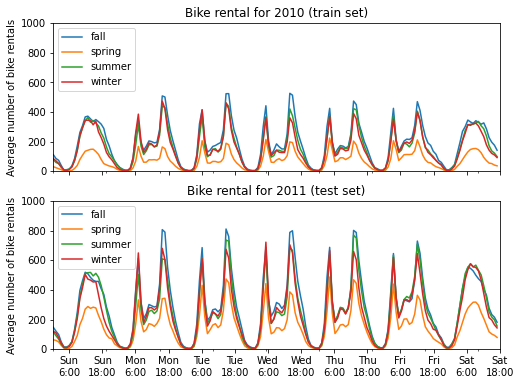

In [9]:
from itertools import product
import numpy as np
import matplotlib.pyplot as plt

days = ("Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat")
hours = tuple(range(24))
xticklabels = [f"{day}\n{hour}:00" for day, hour in product(days, hours)]
xtick_start, xtick_period = 6, 12

fig, axs = plt.subplots(nrows=2, figsize=(8, 6), sharey=True, sharex=True)
average_bike_rentals = bikes.frame.groupby(["year", "season", "weekday", "hour"]).mean(
    numeric_only=True
)["count"]
for ax, (idx, df) in zip(axs, average_bike_rentals.groupby("year")):
    df.groupby("season").plot(ax=ax, legend=True)

    # decorate the plot
    ax.set_xticks(
        np.linspace(
            start=xtick_start,
            stop=len(xticklabels),
            num=len(xticklabels) // xtick_period,
        )
    )
    ax.set_xticklabels(xticklabels[xtick_start::xtick_period])
    ax.set_xlabel("")
    ax.set_ylabel("Average number of bike rentals")
    ax.set_title(
        f"Bike rental for {'2010 (train set)' if idx == 0.0 else '2011 (test set)'}"
    )
    ax.set_ylim(0, 1_000)
    ax.set_xlim(0, len(xticklabels))
    ax.legend(loc=2)

In [10]:
numerical_features = [
    "temp",
    "feel_temp",
    "humidity",
    "windspeed",
]
categorical_features = X_train.columns.drop(numerical_features)

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import OneHotEncoder

mlp_preprocessor = ColumnTransformer(
    transformers=[
        ("num", QuantileTransformer(n_quantiles=100), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)
mlp_preprocessor

ColumnTransformer(transformers=[('num', QuantileTransformer(n_quantiles=100),
                                 ['temp', 'feel_temp', 'humidity',
                                  'windspeed']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 Index(['season', 'month', 'hour', 'holiday', 'weekday', 'workingday',
       'weather'],
      dtype='object'))])

In [12]:
from sklearn.preprocessing import OrdinalEncoder

hgbdt_preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OrdinalEncoder(), categorical_features),
        ("num", "passthrough", numerical_features),
    ],
    sparse_threshold=1,
    verbose_feature_names_out=False,
).set_output(transform="pandas")
hgbdt_preprocessor

ColumnTransformer(sparse_threshold=1,
                  transformers=[('cat', OrdinalEncoder(),
                                 Index(['season', 'month', 'hour', 'holiday', 'weekday', 'workingday',
       'weather'],
      dtype='object')),
                                ('num', 'passthrough',
                                 ['temp', 'feel_temp', 'humidity',
                                  'windspeed'])],
                  verbose_feature_names_out=False)

In [13]:
from time import time
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline

print("Training MLPRegressor...")
tic = time()
mlp_model = make_pipeline(
    mlp_preprocessor,
    MLPRegressor(
        hidden_layer_sizes=(30, 15),
        learning_rate_init=0.01,
        early_stopping=True,
        random_state=0,
    ),
)
mlp_model.fit(X_train, y_train)
print(f"done in {time() - tic:.3f}s")
print(f"Test R2 score: {mlp_model.score(X_test, y_test):.2f}")

Training MLPRegressor...
done in 3.576s
Test R2 score: 0.61


Computing partial dependence plots...
done in 3.680s


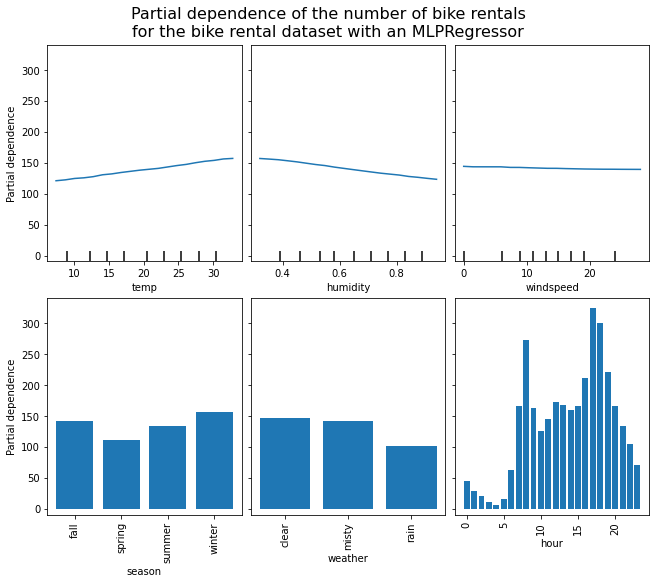

In [14]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

common_params = {
    "subsample": 50,
    "n_jobs": 2,
    "grid_resolution": 20,
    "random_state": 0,
}

print("Computing partial dependence plots...")
features_info = {
    # features of interest
    "features": ["temp", "humidity", "windspeed", "season", "weather", "hour"],
    # type of partial dependence plot
    "kind": "average",
    # information regarding categorical features
    "categorical_features": categorical_features,
}
tic = time()
_, ax = plt.subplots(ncols=3, nrows=2, figsize=(9, 8), constrained_layout=True)
display = PartialDependenceDisplay.from_estimator(
    mlp_model,
    X_train,
    **features_info,
    ax=ax,
    **common_params,
)
print(f"done in {time() - tic:.3f}s")
_ = display.figure_.suptitle(
    "Partial dependence of the number of bike rentals\n"
    "for the bike rental dataset with an MLPRegressor",
    fontsize=16,
)

In [15]:
from sklearn.ensemble import HistGradientBoostingRegressor

print("Training HistGradientBoostingRegressor...")
tic = time()
hgbdt_model = make_pipeline(
    hgbdt_preprocessor,
    HistGradientBoostingRegressor(
        categorical_features=categorical_features, random_state=0
    ),
)
hgbdt_model.fit(X_train, y_train)
print(f"done in {time() - tic:.3f}s")
print(f"Test R2 score: {hgbdt_model.score(X_test, y_test):.2f}")

Training HistGradientBoostingRegressor...
done in 4.877s
Test R2 score: 0.64


Computing partial dependence plots...
done in 6.549s


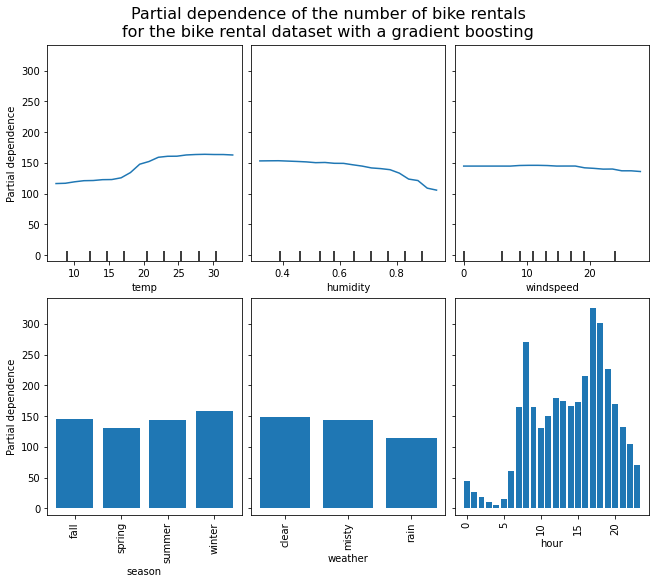

In [16]:
print("Computing partial dependence plots...")
tic = time()
_, ax = plt.subplots(ncols=3, nrows=2, figsize=(9, 8), constrained_layout=True)
display = PartialDependenceDisplay.from_estimator(
    hgbdt_model,
    X_train,
    **features_info,
    ax=ax,
    **common_params,
)
print(f"done in {time() - tic:.3f}s")
_ = display.figure_.suptitle(
    "Partial dependence of the number of bike rentals\n"
    "for the bike rental dataset with a gradient boosting",
    fontsize=16,
)

Computing partial dependence plots...
done in 32.335s


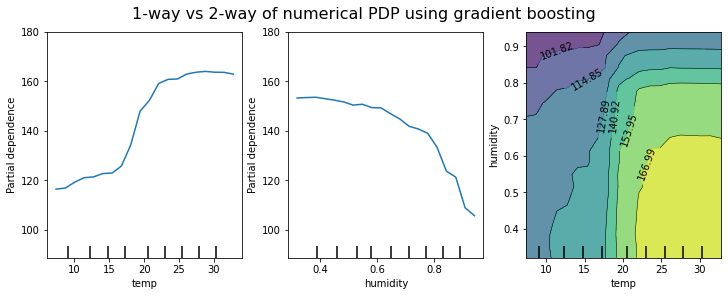

In [17]:
print("Computing partial dependence plots...")
features_info = {
    "features": ["temp", "humidity", ("temp", "humidity")],
    "kind": "average",
}
_, ax = plt.subplots(ncols=3, figsize=(10, 4), constrained_layout=True)
tic = time()
display = PartialDependenceDisplay.from_estimator(
    hgbdt_model,
    X_train,
    **features_info,
    ax=ax,
    **common_params,
)
print(f"done in {time() - tic:.3f}s")
_ = display.figure_.suptitle(
    "1-way vs 2-way of numerical PDP using gradient boosting", fontsize=16)

Computing partial dependence plots...
done in 1.887s


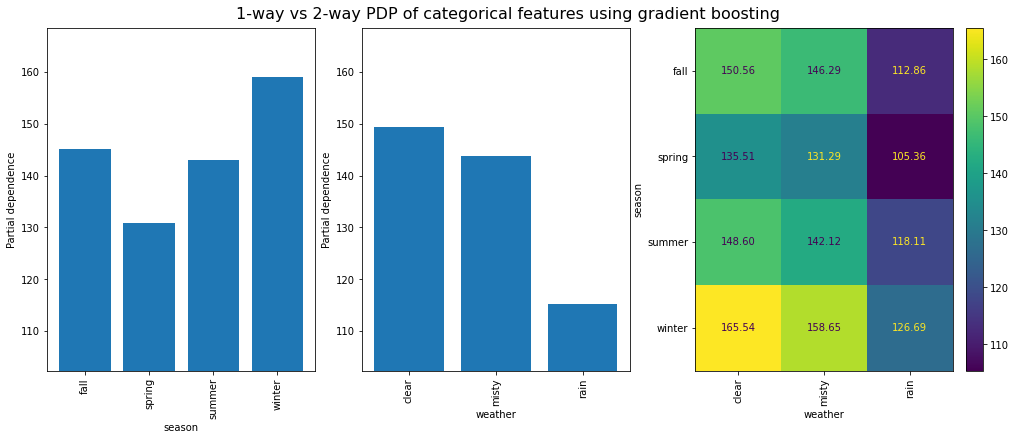

In [18]:
print("Computing partial dependence plots...")
features_info = {
    "features": ["season", "weather", ("season", "weather")],
    "kind": "average",
    "categorical_features": categorical_features,
}
_, ax = plt.subplots(ncols=3, figsize=(14, 6), constrained_layout=True)
tic = time()
display = PartialDependenceDisplay.from_estimator(
    hgbdt_model,
    X_train,
    **features_info,
    ax=ax,
    **common_params,
)

print(f"done in {time() - tic:.3f}s")
_ = display.figure_.suptitle(
    "1-way vs 2-way PDP of categorical features using gradient boosting", fontsize=16
)

## Local model agnostic methods

### Shapley values

Shapley values are a way to distribute gains among players in a cooperative game based on their individual contributions to the overall outcome. 

In the case of machine learning, we can think of features as players and gains as the actual prediction for the instance minus the average of all instances.

## Computation

The main idea is to assign a value to each player [feature] that represents their **average marginal contribution** to the total payoff [value], considering **all possible coalitions** (combinations of players [features]). In other words, what is the difference in value due to the influence of the given player [feature] considering all possible combinations of features. Shapley values are defined as:

$\Large \phi_i(v) = \sum\limits_{S \subseteq N \setminus\lbrace i\rbrace}^{b}  \binom{n}{1, |S|, n - |S| - 1}^{-1} (v(S \cup \lbrace i \rbrace) - v(S))$

where $\phi_i(v)$ is the Shapley value of feature $i$ with value function $v$, $n$ is the total number of players [features], and the sum extends over all subsets $S$ of $N$, the set of players [features].

In practice, we can estimate this difference by replacing the feature by a random value sampled from the distribution of the feature, subtracting and then averaging per coalition.

The Shapley value is the only attribution method that satisfies Efficiency, Symmetry, Dummy and Additivity:

- Efficiency: the feature contributions must add up to the difference between the value of prediction for x and the average prediction.
- Symmetry: the contribution of two features j and k should be the same if they contribute equally to all possible coalitions.
- Dummy: a feature j that does not change the predicted value has a Shapley value of zero
- Additivity: For a game of combined payouts the Shapley values can be added.

Note that the Shapley value is NOT the difference of the predicted value after removing the feature from the model training. It is the difference between the actual prediction and the mean prediction.

# SHAP (SHapley Additive exPlanations) 

In SHAP the Shapley value explanation is represented by a linear model:

$\Large g(z')  =  \phi_0 + \sum\limits_{j=1}^{M} \phi_j z'_j$

where $g$ is the explanation model, $z' \in \lbrace 0, 1 \rbrace^M$ is a coalition vector (0 when the feature is not used, 1 when the feature is used), $M$ is the maximum coalition size, and $\phi_j \in \mathbb{R}$ is the feature attribution to feature $j$.

The value when all features are used correspond to the $g(x')$, with $x'$ a vector of only 1s.

To estimate the SHAP values, $K$ different coalitions are sampled ($z'$) and a linear model is fit to obtain the values of $\phi_j$. The predictions as a function of $z'$ are weighted using a SHAP kernel that is built to comply with the definition of Shapley values:

$\Large \pi_x(z')=\frac{(M-1)}{\binom{M}{|z'|} |z'| (M - |z'|)}$

where $M$ is the maximum coalition size  and $|z'|$ the number of features in instance $z'$.

Te weights are applied using the following loss function to fit the linear model $g$:

$\Large L(\hat{f}, g, \pi_x) = \sum\limits_{z' \in Z} [ \hat{f}(h_x(z')) - g(z')]^2 \pi_x(z')$

where $Z$ is the training data.

## Test SHAP on the iris dataset

In [19]:
import numpy as np
import pandas as pd
import shap
import xgboost
import seaborn as sn

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

shap.initjs()

In [20]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


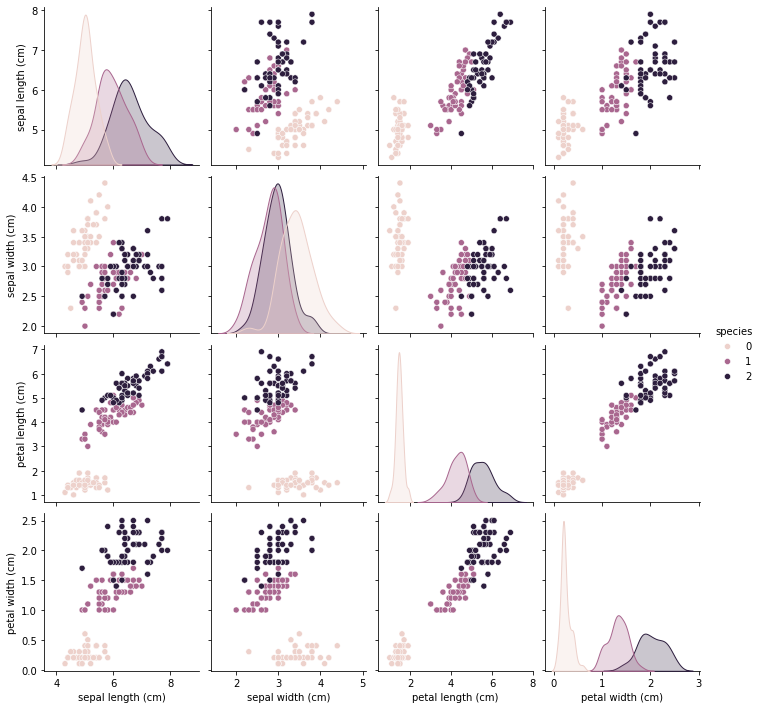

In [22]:
sn.pairplot(df, hue='species')

### Train an XGBoost model

In [23]:
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X_train, label=y_train), 100)

### Initialize SHAP explainer

In [24]:
explainer = shap.Explainer(model)

### Calculate SHAP values for individual samples

In [25]:
# Select a test instance
instance_idx = 5
instance = X_test.iloc[[instance_idx]]
print(y_test[instance_idx])

# Calculate SHAP values
shap_values = explainer(instance)

0


In [26]:
# Plot SHAP values
shap.plots.force(shap_values)

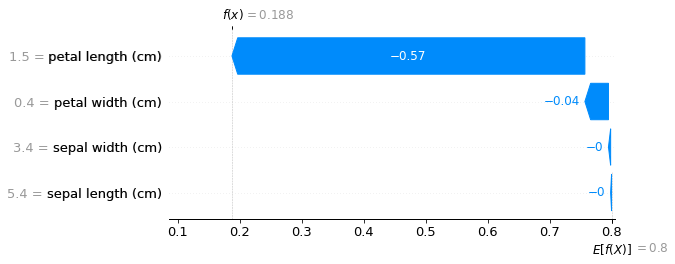

In [27]:
shap.plots.waterfall(shap_values[0])#, max_display=14)

### Mean SHAP value for the whole distribution


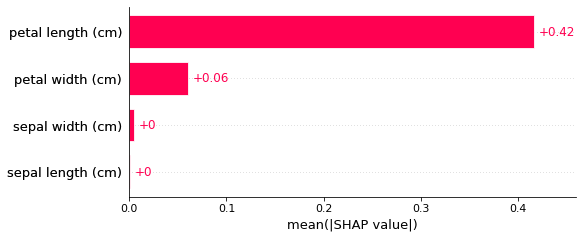

In [28]:
shap_values_test = explainer(X_test)

# Plot SHAP values
shap.plots.bar(shap_values_test.abs.mean(0))

### Distribution of values for the whole distribution

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


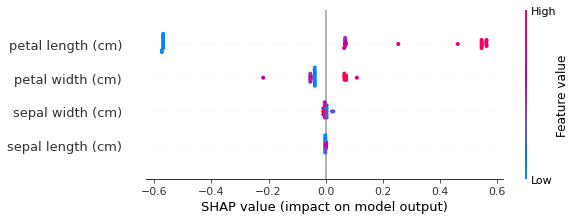

In [29]:
shap.plots.beeswarm(shap_values_test)

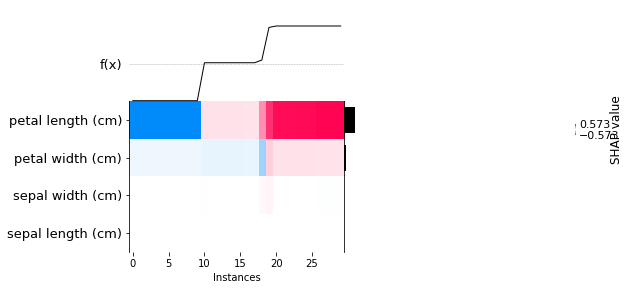

In [30]:
shap.plots.heatmap(shap_values_test)

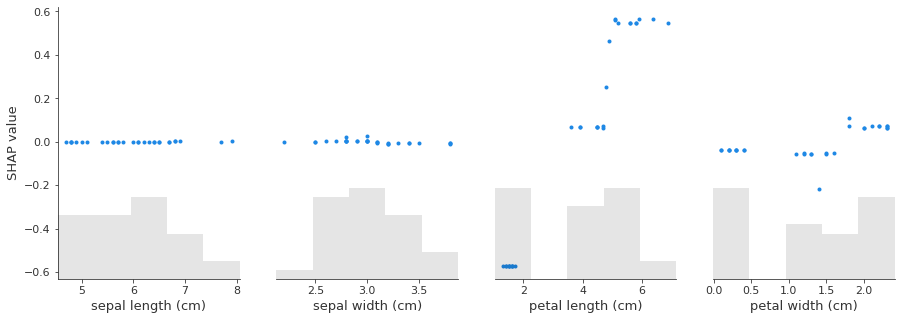

In [31]:
shap.plots.scatter(shap_values_test)

In [32]:
shap_values_test

.values =
array([[ 7.52410851e-04,  2.05395487e-03,  6.45547062e-02,
        -5.27123697e-02],
       [-1.47561182e-03, -3.48902261e-03, -5.68979561e-01,
        -3.80130634e-02],
       [ 1.33121014e-03,  3.07423156e-03,  5.45917094e-01,
         7.08222240e-02],
       [-1.36104866e-03,  2.00486998e-03,  6.78977296e-02,
        -5.38928658e-02],
       [ 1.49948150e-03,  2.18978897e-02,  2.54141718e-01,
        -2.18873486e-01],
       [-1.47561182e-03, -3.48902261e-03, -5.68979561e-01,
        -3.80130634e-02],
       [-1.36104866e-03,  2.00486998e-03,  6.78977296e-02,
        -5.38928658e-02],
       [ 1.44577317e-03, -7.25097349e-03,  5.61894178e-01,
         6.50556833e-02],
       [ 7.13143032e-04, -2.86675728e-04,  6.69227690e-02,
        -5.27005568e-02],
       [-1.36104866e-03,  2.00486998e-03,  6.78977296e-02,
        -5.38928658e-02],
       [ 1.03590032e-03, -8.39896407e-03,  5.62808752e-01,
         6.56990036e-02],
       [-1.36104866e-03,  1.52432441e-03, -5.73279083e-

## Test the SHAP values with the QSO and stars dataset

In [33]:
stars = pd.read_csv("data/SDSS_stars.csv")
stars.head()

,u_mag,g_mag,r_mag,i_mag,z_mag,ra,dec
0,20.533161,17.968031,16.827314,16.373095,16.091063,190.001261,21.910620
1,18.894476,17.674576,17.208895,17.033516,16.972940,190.002330,21.874641
2,18.290901,17.022612,16.625498,16.431305,16.399673,190.012240,21.702999
3,19.784182,17.820679,17.003235,16.721306,16.541569,190.012912,23.667913
4,18.874607,17.638632,17.120625,16.907972,16.849592,190.012951,24.797507


In [34]:
QSOs = pd.read_csv("data/SDSS_QSO.dat", sep = "\s+", index_col = "SDSS")
QSOs.head()

,z,u_mag,sig_u_mag,g_mag,sig_g_mag,r_mag,sig_r_mag,i_mag,sig_i_mag,z_mag,sig_z_mag,FIRST,ROSAT,Mp
SDSS,,,,,,,,,,,,,,
000006.53+003055.2,1.8227,20.389,0.066,20.468,0.034,20.332,0.037,20.099,0.041,20.053,0.121,0.0,-9.0,-25.100
000008.13+001634.6,1.8365,20.233,0.054,20.200,0.024,19.945,0.032,19.491,0.032,19.191,0.068,0.0,-9.0,-25.738
000009.26+151754.5,1.1986,19.921,0.042,19.811,0.036,19.386,0.017,19.165,0.023,19.323,0.069,-1.0,-9.0,-25.085
000009.38+135618.4,2.2400,19.218,0.026,18.893,0.022,18.445,0.018,18.331,0.024,18.110,0.033,-1.0,-9.0,-27.419
000009.42-102751.9,1.8442,19.249,0.036,19.029,0.027,18.980,0.021,18.791,0.018,18.751,0.047,0.0,-9.0,-26.459


In [35]:
stars["cat"] = "star"
stars["ug"] = stars.u_mag - stars.g_mag
stars["gr"] = stars.g_mag - stars.r_mag
stars["ri"] = stars.r_mag - stars.i_mag
stars["iz"] = stars.i_mag - stars.z_mag
QSOs["cat"] = "QSO"
QSOs["ug"] = QSOs.u_mag - QSOs.g_mag
QSOs["gr"] = QSOs.g_mag - QSOs.r_mag
QSOs["ri"] = QSOs.r_mag - QSOs.i_mag
QSOs["iz"] = QSOs.i_mag - QSOs.z_mag

In [36]:
sel_cols = ["ug", "gr", "ri", "iz", "cat"]
data = pd.concat([stars[sel_cols], QSOs[sel_cols].sample(5000, random_state=1)])
#data = pd.concat([stars[sel_cols], QSOs[sel_cols]])
data["cat"] = data["cat"].astype("category")
data.sample(10)

,ug,gr,ri,iz,cat
031839.63-073826.3,0.650000,0.367000,0.405000,0.113000,QSO
085841.92+303641.4,0.416000,-0.106000,0.175000,0.104000,QSO
2151,0.824705,0.265198,0.108595,-0.011086,star
3372,1.355846,0.471151,0.272803,-0.006966,star
95,1.029866,0.361370,0.105120,0.079664,star
002745.23-094603.3,0.734000,0.148000,0.104000,0.481000,QSO
1394,1.879375,0.729155,0.299259,0.118052,star
4442,1.873860,0.746439,0.302006,0.110912,star
2960,2.145969,0.832596,0.364262,0.202726,star
083236.14+240209.9,0.481000,0.016000,-0.106000,0.168000,QSO


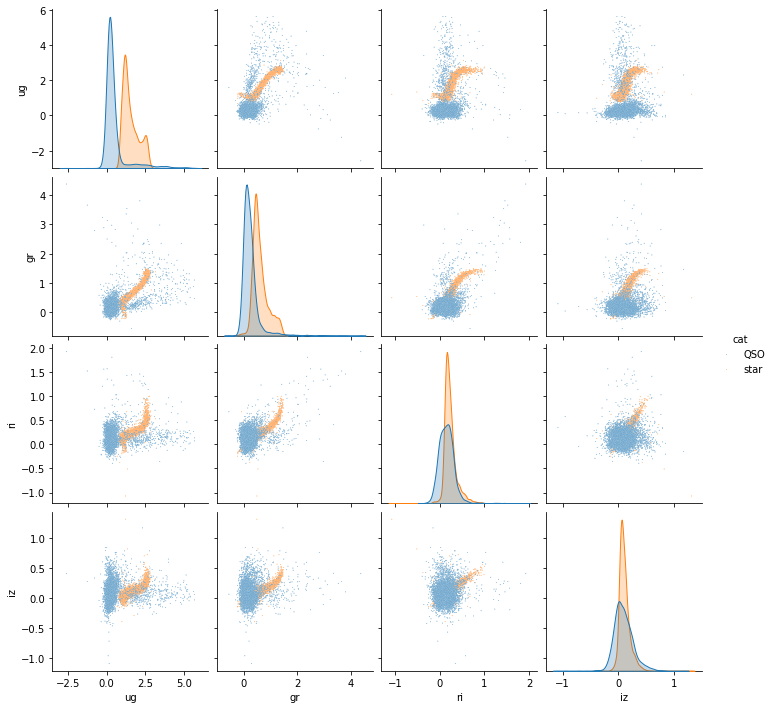

In [37]:
sn.pairplot(data, hue='cat', plot_kws={"s": 3, 'marker': '.'})

In [38]:
X_train, X_test, y_train, y_test = train_test_split(data[["ug", "gr", "ri", "iz"]], data.cat, test_size=.4, random_state=42)

In [39]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data.cat)
print(le.classes_)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

['QSO' 'star']


In [40]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='entropy', n_estimators=1000, oob_score=True, n_jobs=4)#, class_weight='balanced')
y_pred = rfc.fit(X_train, y_train).predict(X_test)
print("Out-of-bag score:", rfc.oob_score_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("f1-score:", metrics.f1_score(y_test, y_pred, pos_label=1))
print("Feature importance:", dict(zip(list(X_train), rfc.feature_importances_)))

Out-of-bag score: 0.9918333333333333
Accuracy: 0.99375
f1-score: 0.9939481965625756
Feature importance: {'ug': 0.659917854172412, 'gr': 0.2169845735792, 'ri': 0.0730520194814016, 'iz': 0.05004555276698632}


Text(0, 0.5, 'Feature importance')

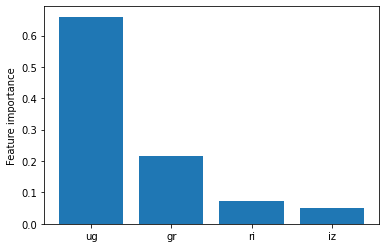

In [42]:
fig, ax = plt.subplots()
ax.bar(list(X_train), rfc.feature_importances_)
ax.set_ylabel("Feature importance")

### Initialize SHAP explainer object

In [43]:
explainer = shap.Explainer(rfc)

In [44]:
instance = X_test.loc[[0]]
shap_values = explainer.shap_values(instance)

In [45]:
instance.values

array([[2.56513 , 1.140717, 0.454219, 0.282032]])

In [46]:
rfc.predict_proba(instance.values)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


array([[0.012, 0.988]])

In [47]:
explainer.expected_value

array([0.50969167, 0.49030833])

In [48]:
shap_values

[array([[-0.29606323, -0.16011764, -0.04908784,  0.00757705]]),
 array([[ 0.29606323,  0.16011764,  0.04908784, -0.00757705]])]

In [49]:
shap.force_plot(explainer.expected_value[0], shap_values[0], instance)

In [50]:
shap.force_plot(explainer.expected_value[1], shap_values[1], instance)

### Get the values for the full sample

In [51]:
shap_values_test = explainer(X_test) #.shap_values

In [52]:
shap_values_test.values.shape

(4000, 4, 2)

### Bar summary plot

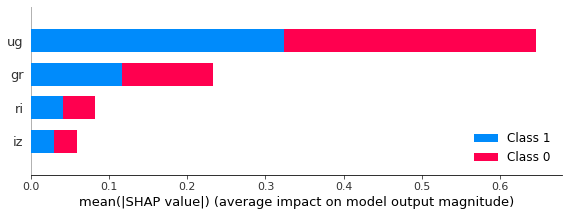

In [53]:
shap.summary_plot([shap_values_test.values[:, :, 0], shap_values_test.values[:, :, 1]], X_test)

### Beeswarm plot

Class 0

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


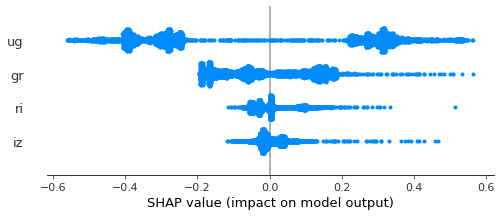

In [54]:
shap.plots.beeswarm(shap.Explanation(shap_values_test.values[:, :, 0], base_values=shap_values_test.base_values, feature_names=X_test.columns))

Class 1

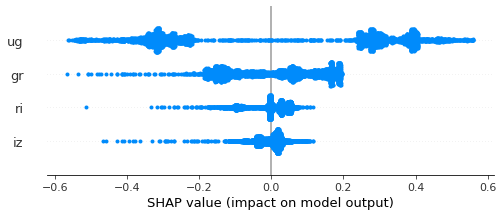

In [55]:
shap.plots.beeswarm(shap.Explanation(shap_values_test.values[:, :, 1], base_values=shap_values_test.base_values, feature_names=X_test.columns))

### Compare feature importance and SHAP values

In [56]:
shap_values_test[:, :, 0].abs.mean(0)

.values =
array([0.32301202, 0.11634309, 0.04134971, 0.02931368])

.base_values =
0.509691666666666

.data =
array([1.03733059, 0.43243674, 0.20860436, 0.12745577])

Text(0, 0.5, 'SHAP values')

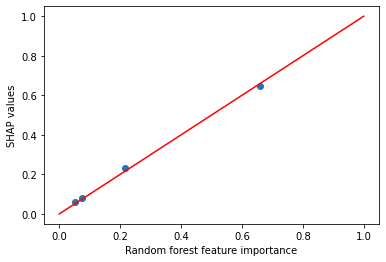

In [57]:
fig, ax = plt.subplots()
ax.scatter(rfc.feature_importances_, shap_values_test[:, :, 0].abs.mean(0).values + shap_values_test[:, :, 1].abs.mean(0).values)
ax.plot([0, 1], [0, 1], c='r')
ax.set_xlabel("Random forest feature importance")
ax.set_ylabel("SHAP values")

# SHAP values and deep learning

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import colormaps as cmaps

In [59]:
import tensorflow as tf
import shap
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the data
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2836 - accuracy: 0.9183 - val_loss: 0.1526 - val_accuracy: 0.9560
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1276 - accuracy: 0.9621 - val_loss: 0.1127 - val_accuracy: 0.9677
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0859 - accuracy: 0.9739 - val_loss: 0.1030 - val_accuracy: 0.9688
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0644 - accuracy: 0.9804 - val_loss: 0.0868 - val_accuracy: 0.9728
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0508 - accuracy: 0.9840 - val_loss: 0.0897 - val_accuracy: 0.9733


In [63]:
predictions = model.predict(x_test).argmax(axis=1)

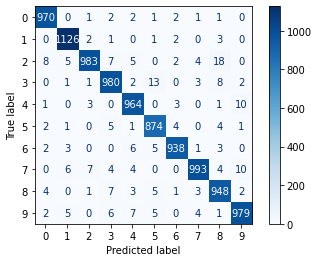

In [64]:
# Show confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap=cmaps["Blues"])

This method needs a random sample in the training set. See https://shap-lrjball.readthedocs.io/en/latest/generated/shap.DeepExplainer.html:

This is an enhanced version of the DeepLIFT algorithm (Deep SHAP) where, similar to Kernel SHAP, we approximate the conditional expectations of SHAP values using a selection of background samples. [Lundberg and Lee, NIPS 2017](https://papers.nips.cc/paper_files/paper/2017/file/8a20a8621978632d76c43dfd28b67767-Paper.pdf) showed that the per node attribution rules in DeepLIFT (Shrikumar, Greenside, and Kundaje, arXiv 2017) can be chosen to approximate Shapley values. By integrating over many backgound samples Deep estimates approximate SHAP values such that they sum up to the difference between the expected model output on the passed background samples and the current model output (f(x) - E[f(x)]).



In [65]:
# Select a subset of the test data to explain
background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]
test_samples = x_test[:11]

# Create a SHAP explainer
explainer = shap.DeepExplainer(model, background)

# Compute SHAP values for the test samples
shap_values = explainer.shap_values(test_samples)

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


In [66]:
shap_values[9].shape

(11, 28, 28, 1)

0


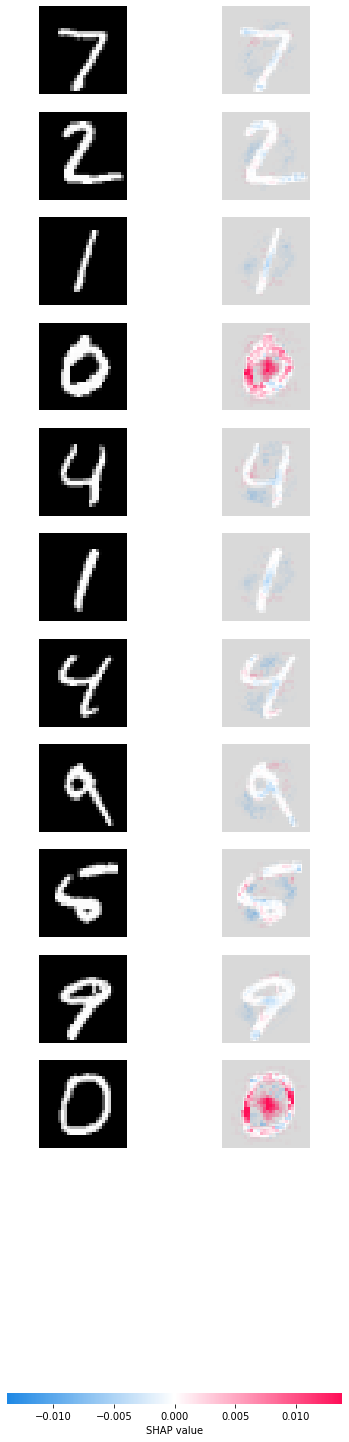

1


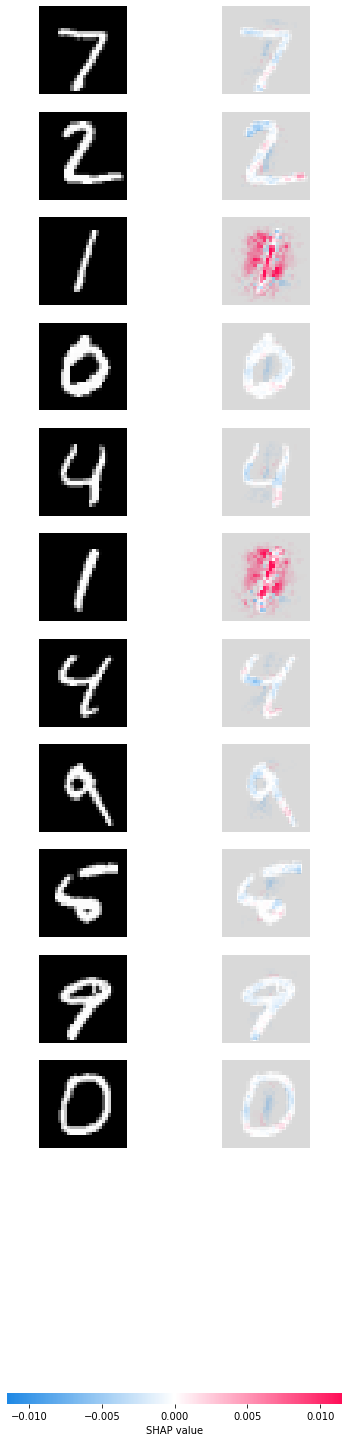

2


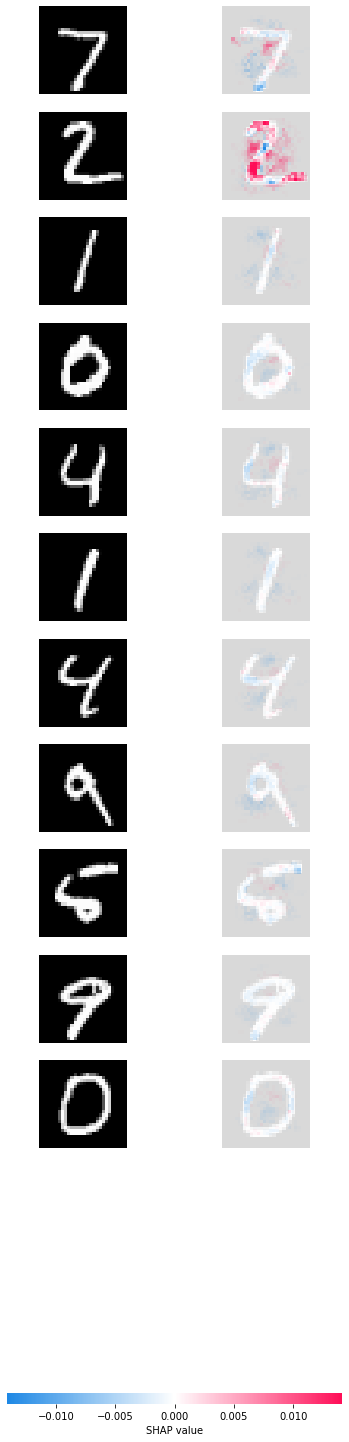

3


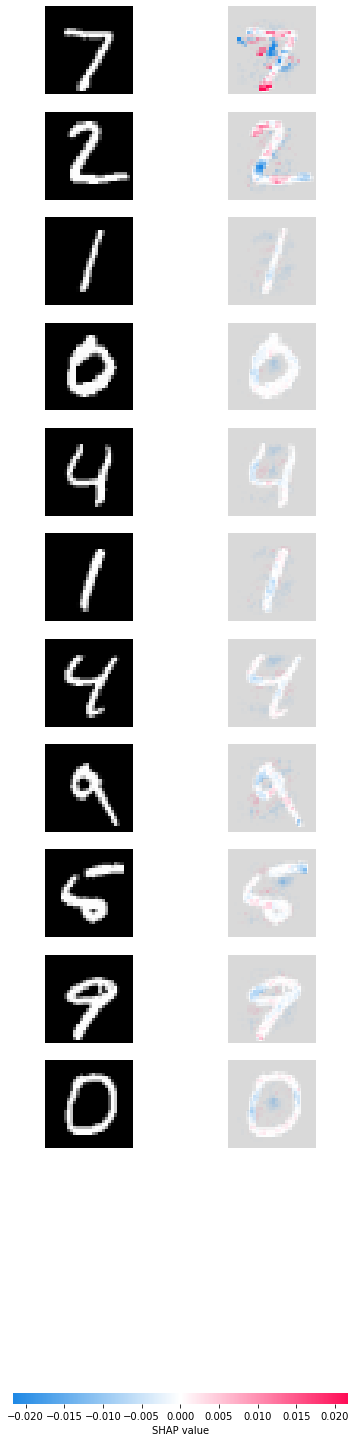

4


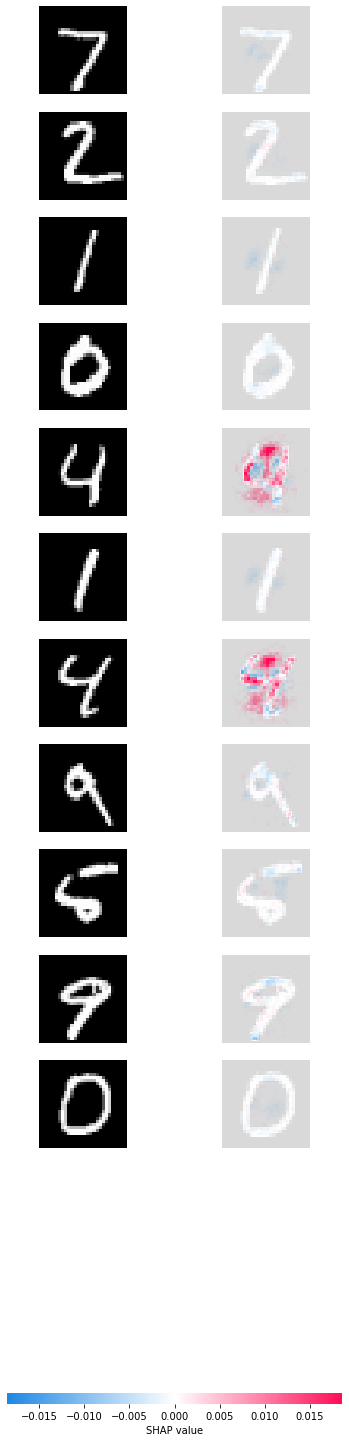

5


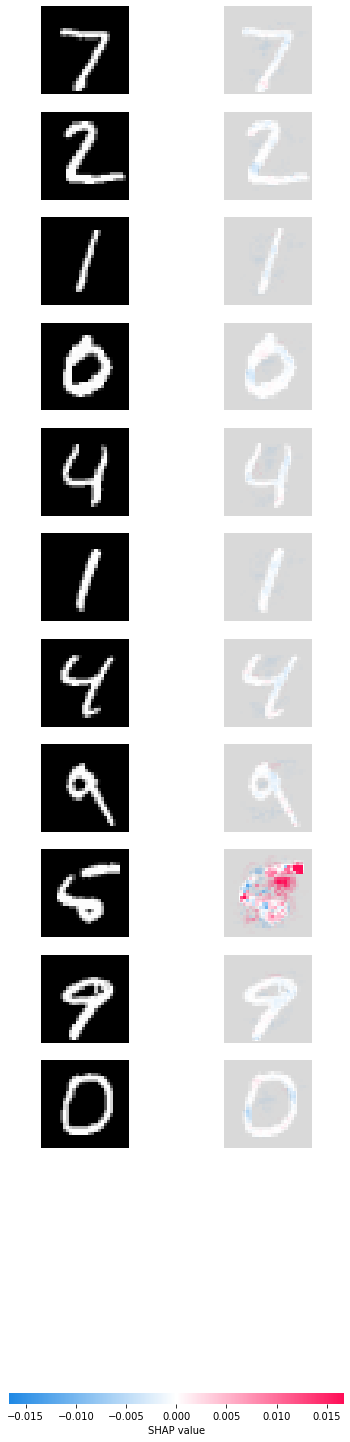

6


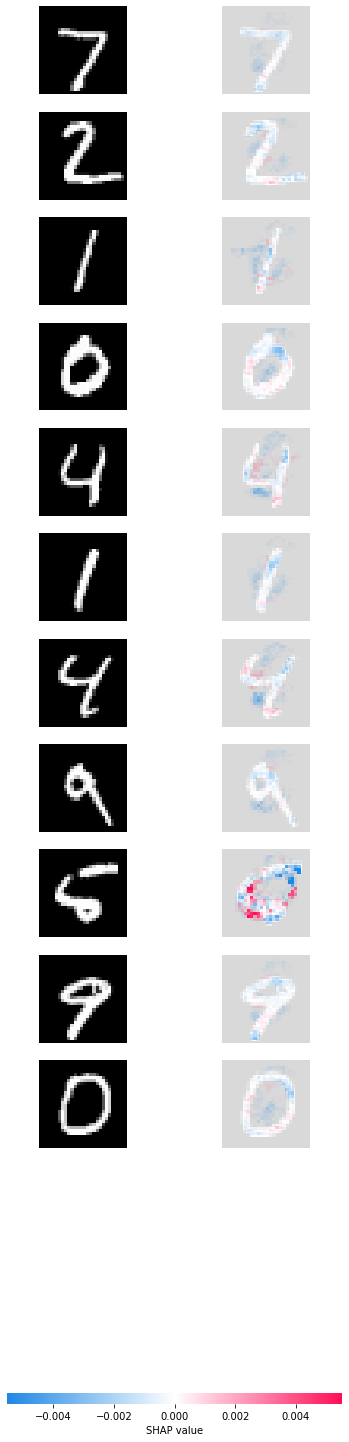

7


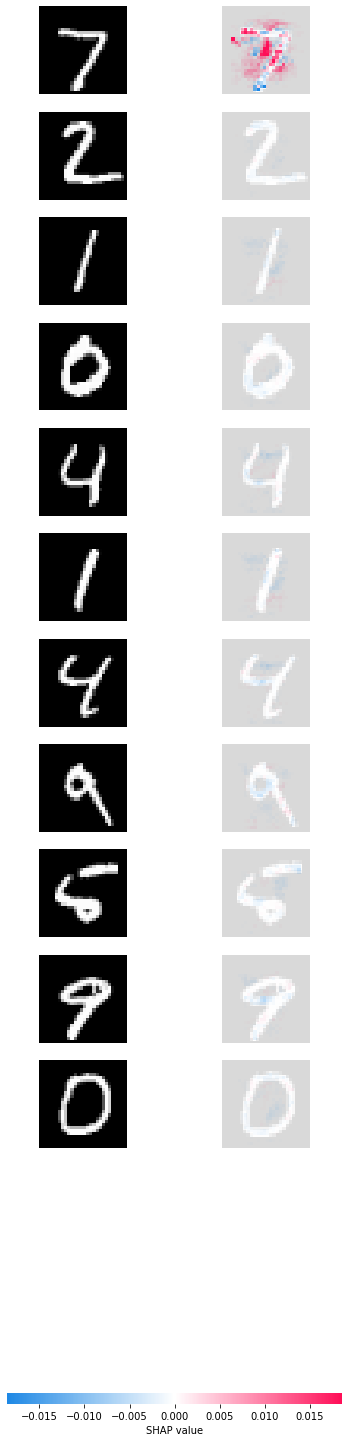

8


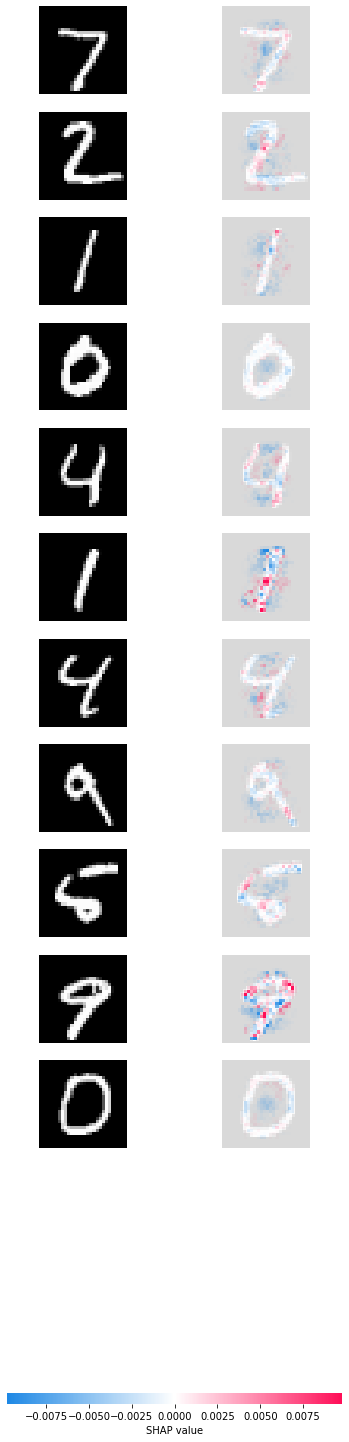

9


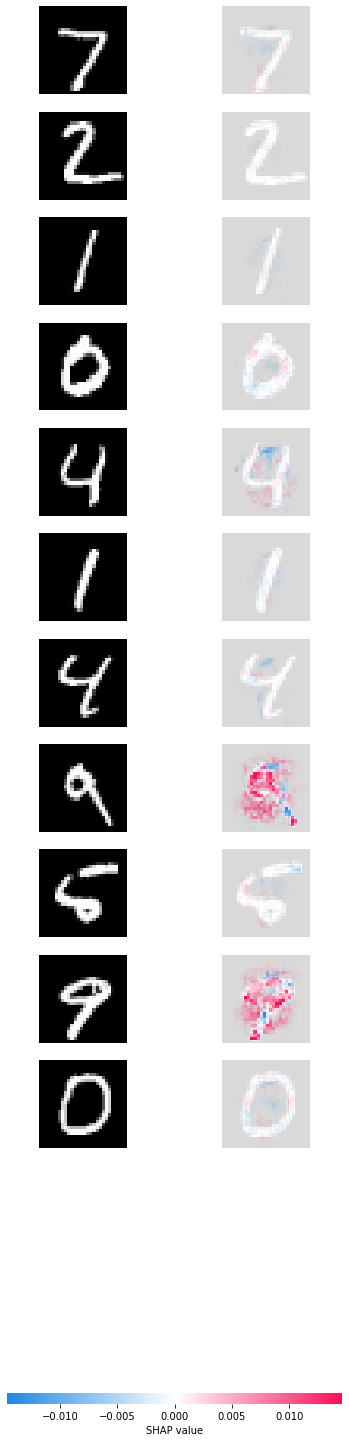

In [67]:
for n in range(10):
    print(n)
    # Plot the SHAP values for a specific class (e.g., digit 0)
    shap.image_plot(shap_values[n], test_samples)